## Analyzing google_search_history script

In [1]:
from google_search_history import process
from tests import test_google_search_history, simulation_google_search_history
from pathlib import Path
import pandas as pd
import io

### 1. Testing functionality of script

In [2]:
test_google_search_history.test_extract() # if not AssertionError: outcome is as expected

In [3]:
test_google_search_history.test_process() # if not AssertionError: outcome is as expected

### 2. Use case: simulated Google Takeout data

In [4]:
# # Create seeded simulation data
# file_data = POC_google_search_history.BrowserHistory(
#         n=1000, site_diff=0.15, time_diff=True, seed=0, fake=False)
# POC_google_search_history.__createZip(file_data)

In [7]:
data = Path('tests/data/takeout.zip') # Enter path to takeout.zip data
output = process(data)
output

{'summary': '\nWith this research we want to invesitgate how our news consumption behavior has changed during/after the COVID-19 related curfew. To examine this, we looked at your Google Search History.\nFirst, we divided your browser history into three periods:\n- before the start of the curfew (i.e., pages visited before 2021-01-23 21:00:00),\n- during the curfew (i.e., pages visited between 2021-01-23 21:00:00 and 2021-04-28 04:30:00) and\n- post curfew (i.e., pages visited after 2021-04-28 04:30:00).\nFor each period, we counted how many times you visited a news website versus any another type of website (i.e., news/other). While counting, we also took the time of day (i.e., morning/afternoon/evening/night) into account.\n\n    read_files: BrowserHistory.json\n    Your earliest web search was on 2020-10-22 22:55:00,\n    The Dutch curfew took place between 2021-01-23 21:00:00 and 2021-04-28 04:30:00,\n    Your latest web search was on 2021-07-22 15:39:00.\n    ',
 'data_frames': [ 

In [8]:
print(output['summary'])


With this research we want to invesitgate how our news consumption behavior has changed during/after the COVID-19 related curfew. To examine this, we looked at your Google Search History.
First, we divided your browser history into three periods:
- before the start of the curfew (i.e., pages visited before 2021-01-23 21:00:00),
- during the curfew (i.e., pages visited between 2021-01-23 21:00:00 and 2021-04-28 04:30:00) and
- post curfew (i.e., pages visited after 2021-04-28 04:30:00).
For each period, we counted how many times you visited a news website versus any another type of website (i.e., news/other). While counting, we also took the time of day (i.e., morning/afternoon/evening/night) into account.

    read_files: BrowserHistory.json
    Your earliest web search was on 2020-10-22 22:55:00,
    The Dutch curfew took place between 2021-01-23 21:00:00 and 2021-04-28 04:30:00,
    Your latest web search was on 2021-07-22 15:39:00.
    


In [9]:
overview = output['data_frames'][0]
overview

,Curfew,Website,Time,Searches
0,before,news,morning,5
1,before,news,afternoon,12
2,before,news,evening,6
3,before,news,night,9
4,before,other,morning,53
5,before,other,afternoon,44
6,before,other,evening,48
7,before,other,night,45
8,during,news,morning,9
9,during,news,afternoon,12


In [10]:
curf_web = overview.groupby(['Website']).sum()
curf_web['%'] = curf_web.apply(lambda x: x/x.sum())
curf_web

,Searches,%
Website,,
news,121,0.179259
other,554,0.820741


In [11]:
curf_web = overview.groupby(['Curfew', 'Website']).sum()
curf_web['%'] = curf_web.groupby(level=0).apply(lambda x: x/x.sum())
curf_web

Searches         %
Curfew Website                    
before news           32  0.144144
       other         190  0.855856
during news           60  0.258621
       other         172  0.741379
post   news           29  0.131222
       other         192  0.868778

In [12]:
curf_time_web = overview.groupby(['Curfew', 'Time', 'Website']).sum()
curf_time_web['%'] = curf_time_web.groupby(['Curfew', 'Time']).apply(lambda x: x/x.sum())
curf_time_web

Searches         %
Curfew Time      Website                    
before afternoon news           12  0.214286
                 other          44  0.785714
       evening   news            6  0.111111
                 other          48  0.888889
       morning   news            5  0.086207
                 other          53  0.913793
       night     news            9  0.166667
                 other          45  0.833333
during afternoon news           12  0.285714
                 other          30  0.714286
       evening   news           26  0.257426
                 other          75  0.742574
       morning   news            9  0.219512
                 other          32  0.780488
       night     news           13  0.270833
                 other          35  0.729167
post   afternoon news            8  0.150943
                 other          45  0.849057
       evening   news            6  0.120000
                 other          44  0.880000
       morning   news            6  0.103448
                 other          52  0.896552
       night     news            9  0.150000
                 other          51  0.850000

<AxesSubplot:xlabel='Website', ylabel='Searches'>

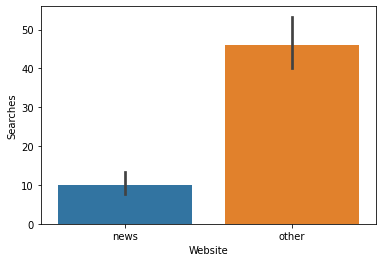

In [13]:
import seaborn as sns
sns.barplot(x='Website', y='Searches', data=overview)

### Browser history at different moments 
#### Number of news vs. other searches before, during and after the curfew

<AxesSubplot:xlabel='Curfew', ylabel='Searches'>

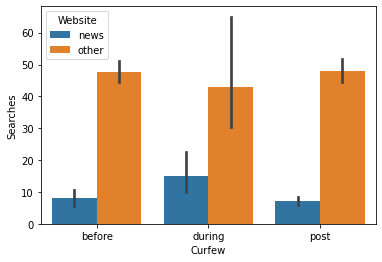

In [14]:
sns.barplot(x='Curfew', y='Searches', hue='Website', data=overview)

### Browser history at different times of the day
#### Number of news vs. other searches at different times before the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

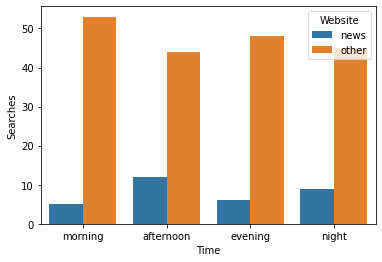

In [15]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'before'])

#### Number of news vs. other searches at different times during the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

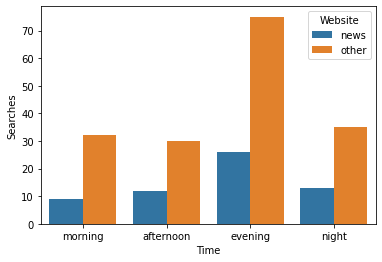

In [16]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'during'])

#### Number of news vs. other searches at different times after the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

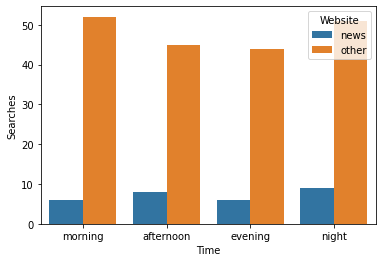

In [17]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'post'])